# VGG-16 Architecture

![alt text](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

## Flattened VGG-16 Architecture

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16-1024x450.jpg)





## VGG-16 Architecture codes using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing required Libraries

In [15]:
# Importing the required libraries
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

## Checking version of keras used

In [3]:
keras.__version__

'2.3.1'

## Augmenting the training and testing dataset

In [4]:
# Augmenting the Training dataset
idg = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, horizontal_flip=True, rescale=1/255.0)
training_data = idg.flow_from_directory(r"/content/drive/My Drive/Pets/training_pets", target_size = (224, 224))

Found 246 images belonging to 2 classes.


In [5]:
# Augmenting the Testing dataset
idg = ImageDataGenerator(rescale=1/255.0)
testing_data = idg.flow_from_directory(r"/content/drive/My Drive/Pets/testing_pets", target_size = (224, 224))

Found 32 images belonging to 2 classes.


## Creation of Model

In [32]:
# Initializing a Sequential model
model = Sequential()

# Creating first block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (224, 224, 3), activation= 'relu'))
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating second block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating third block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fourth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fifth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Flattening the pooled image pixels
model.add(Flatten())

# Creating 2 Dense Layers
model.add(Dense(units= 4096, activation='relu'))
model.add(Dense(units= 4096, activation='relu'))

# Creating an output layer
model.add(Dense(units= 2, activation='softmax'))

## Summary of Model

In [33]:
# Getting the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

## Compiling & Fitting the model

In [7]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Fitting the model
result = model.fit_generator(steps_per_epoch=100, generator=training_data, verbose=1, validation_data=testing_data, epochs=50 )

Epoch 1/50
100/100 [==============================] - 91s 913ms/step - loss: 0.6487 - accuracy: 0.6479 - val_loss: 0.7395 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 91s 909ms/step - loss: 0.6511 - accuracy: 0.6448 - val_loss: 0.7331 - val_accuracy: 0.5000
Epoch 3/50
100/100 [==============================] - 91s 910ms/step - loss: 0.6503 - accuracy: 0.6455 - val_loss: 0.7386 - val_accuracy: 0.5000
Epoch 4/50
100/100 [==============================] - 91s 908ms/step - loss: 0.6491 - accuracy: 0.6472 - val_loss: 0.7341 - val_accuracy: 0.5000
Epoch 5/50
100/100 [==============================] - 91s 910ms/step - loss: 0.6504 - accuracy: 0.6461 - val_loss: 0.7389 - val_accuracy: 0.5000
Epoch 6/50
100/100 [==============================] - 91s 908ms/step - loss: 0.6501 - accuracy: 0.6466 - val_loss: 0.7382 - val_accuracy: 0.5000
Epoch 7/50
100/100 [==============================] - 91s 907ms/step - loss: 0.6494 - accuracy: 0.6461 - val_loss: 0.7392 - val_ac

## Loading the image for testing

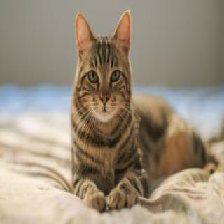

In [26]:
# Load the testing image
test_img = image.load_img(r"/content/cat.jpg", target_size=(224,224))
test_img

## Converting the loaded image into array

In [27]:
# Converting image to array
test_img = np.asarray(test_img)
test_img.shape

(224, 224, 3)

In [28]:
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

(1, 224, 224, 3)

## Predicting the label of loaded image

In [29]:
output = model.predict(test_img)

In [30]:
output

array([[9.9995220e-01, 4.7851096e-05]], dtype=float32)

In [31]:
if output[0][0] > output[0][1]:
  print("Cat")
else:
  print("Dog")

Cat
